# Three SVM implementations for the MNIST dataset, incorporating a gridsearch for model tuning.

## Nikolaos Andriotis

## The goal of this project is to classify correctly whether a digit is even or odd. For this purpose, I will implement a linear SVM and two non-linear SVMs, one with a polynomial kernel and one with an RBF kernel.

### Standard imports

In [ ]:
import os
import urllib.request
import gzip
import shutil
import codecs
import numpy as np
import pandas as pd
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import time

## We first need to store the files and unzip them

In [ ]:
# Define the path to store train data and test data [images + labels]
path_to_store = "./MNIST/"
os.makedirs(path_to_store)

urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

# Using the urls, get the files
for url in urls:
    name_of_file = url.split('/')[-1]
    urllib.request.urlretrieve(url, path_to_store + name_of_file)

files = os.listdir(path_to_store)

# unzip the files
for file in files:
    if file.endswith('gz'):
        with gzip.open(path_to_store + file, 'rb')  as f_in:
            with open(path_to_store + file.split('.')[0], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

# remove the .tar files
for file in files:
    os.remove(path_to_store + file)

## Since the files are in binary we need to properly decode them in order to get the information

In [ ]:
# encode them properly
def get_int(b):
    return int(codecs.encode(b, 'hex'), 16)

files = os.listdir(path_to_store)

# Store each file into a numpy array
for file in files:
    if file.endswith('ubyte'):
        with open(path_to_store + file, 'rb') as f:
            data = f.read()
            magic_number = get_int(data[:4])
            length = get_int(data[4:8])
            if (magic_number == 2051):
                images = np.frombuffer(data, dtype= np.uint8, offset = 16).reshape(length, 784)
                if(length == 60000):
                    train_images = images # normalization
                if(length == 10000):
                    test_images = images # normalization
            elif (magic_number == 2049):
                labels = np.frombuffer(data, dtype= np.uint8, offset = 8).reshape(length)
                if(length == 60000):
                    train_labels = labels
                if(length == 10000):
                    test_labels = labels

## The labels are defined to have the digit that is shown in the image. Since we are doing a binary classification, we have to change the labels. We will denote with a "+1", those images that depict an even number, and with a "-1", those that depict an odd number.

In [ ]:
train_binary_labels = []
for label in train_labels:
    if label % 2 == 0:
        train_binary_labels.append(1)
    else:
        train_binary_labels.append(-1)

train_binary_labels = np.array(train_binary_labels)

test_binary_labels = []
for label in test_labels:
    if label % 2 == 0:
        test_binary_labels.append(1)
    else:
        test_binary_labels.append(-1)

test_binary_labels = np.array(test_binary_labels)

## SVMs are not fond of large datasets. To counter that, I'm going to take a small subset using the train_test_split function.

* 8,400 train images
* 12,600 test images

In [ ]:
# Simply normalization between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Center to the mean and component wise scale to unit variance
train_images = scale(train_images)

# Split dataframes into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_binary_labels, train_size=0.14, test_size=0.21, random_state=42, shuffle=True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8400, 784), (12600, 784), (8400,), (12600,))

## Linear SVM implementation

In [ ]:
start = time.time()
# Create the model with default parameters
linear = SVC(kernel="linear", random_state=42)
linear.fit(X_train, y_train)

# predict
y_pred = linear.predict(X_test)

# defining parameter range, it will be the same for all implementations except for kernel
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_linear = GridSearchCV(linear, param_grid, refit=True, verbose=3, cv=3, return_train_score=True)

# fitting the model for grid search
grid_linear.fit(X_train, y_train)
end = time.time()
print("Linear grid search took : ", (end-start)/60)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END C=0.1, gamma=1;, score=(train=0.928, test=0.879) total time=  11.2s
[CV 2/3] END C=0.1, gamma=1;, score=(train=0.926, test=0.874) total time=  10.7s
[CV 3/3] END C=0.1, gamma=1;, score=(train=0.933, test=0.869) total time=  11.4s
[CV 1/3] END C=0.1, gamma=0.1;, score=(train=0.928, test=0.879) total time=  11.0s
[CV 2/3] END C=0.1, gamma=0.1;, score=(train=0.926, test=0.874) total time=  10.7s
[CV 3/3] END C=0.1, gamma=0.1;, score=(train=0.933, test=0.869) total time=  11.1s
[CV 1/3] END C=0.1, gamma=0.01;, score=(train=0.928, test=0.879) total time=  10.8s
[CV 2/3] END C=0.1, gamma=0.01;, score=(train=0.926, test=0.874) total time=  10.6s
[CV 3/3] END C=0.1, gamma=0.01;, score=(train=0.933, test=0.869) total time=  11.2s
[CV 1/3] END C=0.1, gamma=0.001;, score=(train=0.928, test=0.879) total time=  11.1s
[CV 2/3] END C=0.1, gamma=0.001;, score=(train=0.926, test=0.874) total time=  11.1s
[CV 3/3] END C=0.1, gamma

## Polynomial SVM implementation

In [ ]:
start = time.time()
# Create the model with default parameters
polynomial = SVC(kernel="poly", random_state=42)
polynomial.fit(X_train, y_train)

# predict
y_pred = linear.predict(X_test)

# defining parameter range, it will be the same for all implementations except for kernel
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

# I chose 3-fold because it took a lot of time to grid search with 5-fold
grid_polynomial = GridSearchCV(polynomial, param_grid, refit=True, verbose=3, cv=3, return_train_score=True)

# fitting the model for grid search
grid_polynomial.fit(X_train, y_train)
end = time.time()
print("Linear grid search took : ", end - start)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END C=0.01, gamma=1;, score=(train=1.000, test=0.960) total time=   8.5s
[CV 2/3] END C=0.01, gamma=1;, score=(train=1.000, test=0.966) total time=   8.2s
[CV 3/3] END C=0.01, gamma=1;, score=(train=1.000, test=0.965) total time=   8.6s
[CV 1/3] END C=0.01, gamma=0.1;, score=(train=1.000, test=0.960) total time=   8.6s
[CV 2/3] END C=0.01, gamma=0.1;, score=(train=1.000, test=0.966) total time=   8.4s
[CV 3/3] END C=0.01, gamma=0.1;, score=(train=1.000, test=0.965) total time=   8.7s
[CV 1/3] END C=0.01, gamma=0.01;, score=(train=0.992, test=0.960) total time=   9.9s
[CV 2/3] END C=0.01, gamma=0.01;, score=(train=0.993, test=0.965) total time=  10.3s
[CV 3/3] END C=0.01, gamma=0.01;, score=(train=0.992, test=0.961) total time=  10.4s
[CV 1/3] END C=0.01, gamma=0.001;, score=(train=0.521, test=0.515) total time=  26.1s
[CV 2/3] END C=0.01, gamma=0.001;, score=(train=0.519, test=0.516) total time=  26.1s
[CV 3/3] END C

## Let's look at the results and plot them

In [ ]:
poly_results = pd.DataFrame(grid_polynomial.cv_results_)

We have 5 options for the gamma parameter and 5 options for C for the c parameter. We will do the following:

* Treat gamma as a constant and vary C
* Treat C as a constant and vary gamma

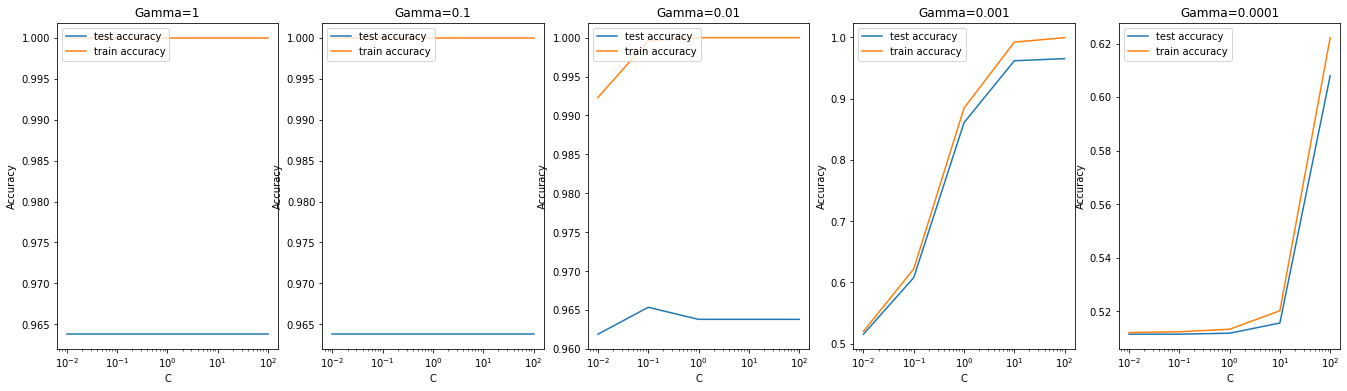

In [ ]:
# 'C': 0.01 0.1 1 10 100 'gamma': 1, 0.1, 0.01, 0.001, 0.0001

plt.figure(figsize=(23,6))

# subplot 1/5
plt.subplot(151)
gamma_1 = poly_results[poly_results['param_gamma'] == 1]

plt.plot(gamma_1['param_C'].astype('float'), gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'].astype('float'), gamma_1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=1')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/5
plt.subplot(152)
gamma_01 = poly_results[poly_results['param_gamma'] == 0.1]

plt.plot(gamma_01['param_C'].astype('float'), gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'].astype('float'), gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.1')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/5
plt.subplot(153)
gamma_001 = poly_results[poly_results['param_gamma'] == 0.01]

plt.plot(gamma_001['param_C'].astype('float'), gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'].astype('float'), gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.01')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 4/5
plt.subplot(154)
gamma_0001 = poly_results[poly_results['param_gamma'] == 0.001]

plt.plot(gamma_0001['param_C'].astype('float'), gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'].astype('float'), gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.001')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 5/5
plt.subplot(155)
gamma_00001 = poly_results[poly_results['param_gamma'] == 0.0001]

plt.plot(gamma_00001['param_C'].astype('float'), gamma_00001['mean_test_score'])
plt.plot(gamma_00001['param_C'].astype('float'), gamma_00001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.0001')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

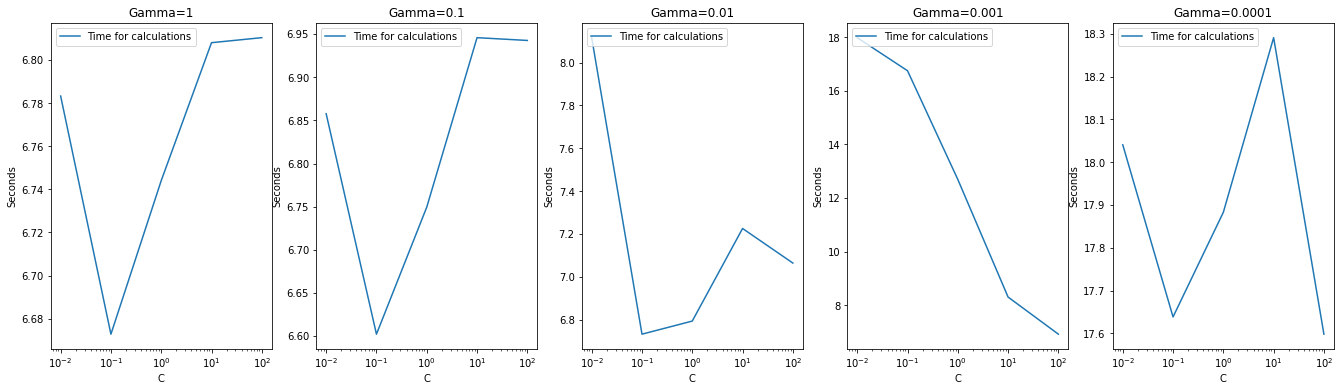

In [ ]:
# 'C': 0.01 0.1 1 10 100 'gamma': 1, 0.1, 0.01, 0.001, 0.0001

plt.figure(figsize=(23,6))

# subplot 1/5
plt.subplot(151)
gamma_1 = poly_results[poly_results['param_gamma'] == 1]

plt.plot(gamma_1['param_C'].astype('float'), gamma_1['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=1')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 2/5
plt.subplot(152)
gamma_01 = poly_results[poly_results['param_gamma'] == 0.1]

plt.plot(gamma_01['param_C'].astype('float'), gamma_01['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=0.1')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 3/5
plt.subplot(153)
gamma_001 = poly_results[poly_results['param_gamma'] == 0.01]

plt.plot(gamma_001['param_C'].astype('float'), gamma_001['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=0.01')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 4/5
plt.subplot(154)
gamma_0001 = poly_results[poly_results['param_gamma'] == 0.001]

plt.plot(gamma_0001['param_C'].astype('float'), gamma_0001['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=0.001')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 5/5
plt.subplot(155)
gamma_00001 = poly_results[poly_results['param_gamma'] == 0.0001]

plt.plot(gamma_00001['param_C'].astype('float'), gamma_00001['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=0.0001')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

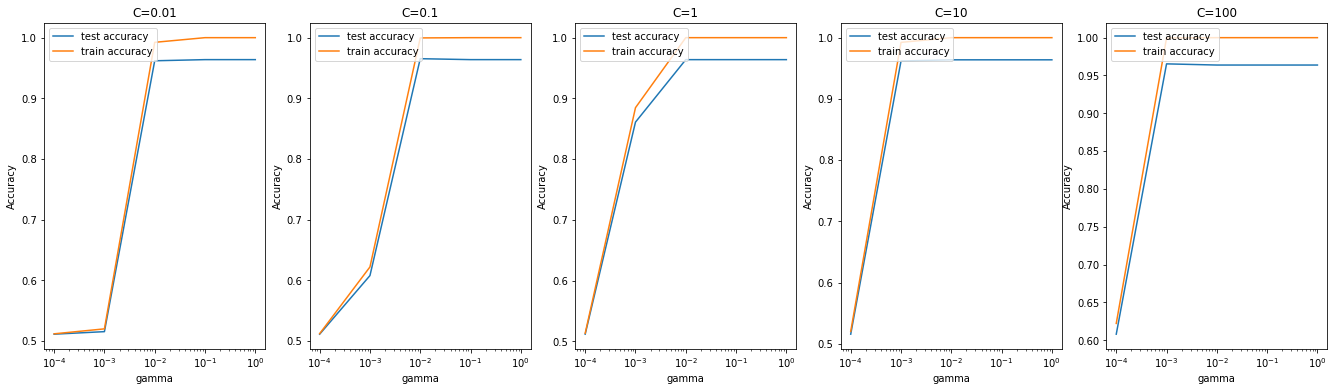

In [ ]:
# 'C': 0.01 0.1 1 10 100 'gamma': 1, 0.1, 0.01, 0.001, 0.0001

# convert gamma to numeric type for plotting

plt.figure(figsize=(23,6))

# subplot 1/5
plt.subplot(151)
c_1 = poly_results[poly_results['param_C'] == 0.01]
plt.plot(c_1['param_gamma'].astype('float'), c_1['mean_test_score'])
plt.plot(c_1['param_gamma'].astype('float'), c_1['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=0.01')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/5
plt.subplot(152)
c_2 = poly_results[poly_results['param_C'] == 0.1]
plt.plot(c_2['param_gamma'].astype('float'), c_2['mean_test_score'])
plt.plot(c_2['param_gamma'].astype('float'), c_2['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=0.1')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/5
plt.subplot(153)
c_3 = poly_results[poly_results['param_C'] == 1]
plt.plot(c_3['param_gamma'].astype('float'), c_3['mean_test_score'])
plt.plot(c_3['param_gamma'].astype('float'), c_3['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=1')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 4/5
plt.subplot(154)
c_4 = poly_results[poly_results['param_C'] == 10]
plt.plot(c_4['param_gamma'].astype('float'), c_4['mean_test_score'])
plt.plot(c_4['param_gamma'].astype('float'), c_4['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=10')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 5/5
plt.subplot(155)
c_5 = poly_results[poly_results['param_C'] == 100]
plt.plot(c_5['param_gamma'].astype('float'), c_5['mean_test_score'])
plt.plot(c_5['param_gamma'].astype('float'), c_5['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=100')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

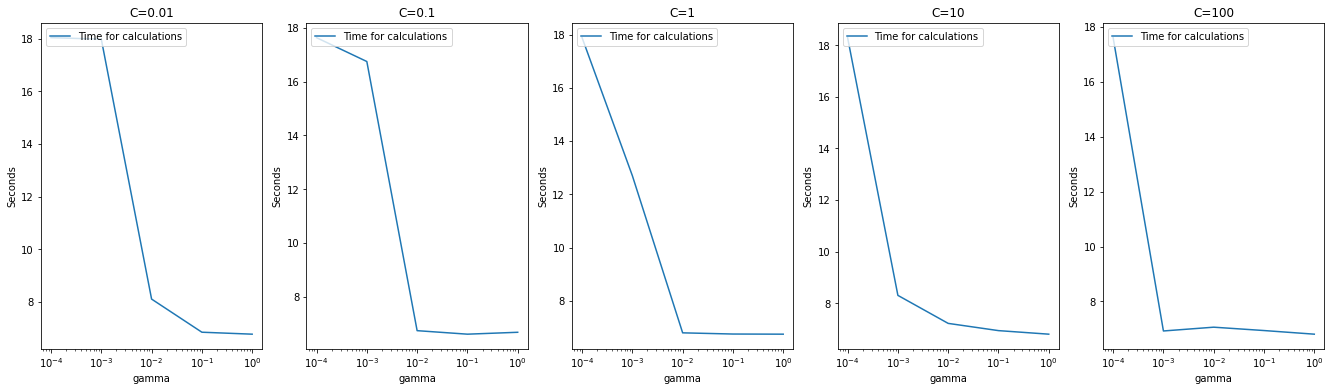

In [ ]:
# 'C': 0.01 0.1 1 10 100 'gamma': 1, 0.1, 0.01, 0.001, 0.0001

# convert gamma to numeric type for plotting

plt.figure(figsize=(23,6))

# subplot 1/5
plt.subplot(151)
c_1 = poly_results[poly_results['param_C'] == 0.01]
plt.plot(c_1['param_gamma'].astype('float'), c_1['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=0.01')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 2/5
plt.subplot(152)
c_2 = poly_results[poly_results['param_C'] == 0.1]
plt.plot(c_2['param_gamma'].astype('float'), c_2['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=0.1')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 3/5
plt.subplot(153)
c_3 = poly_results[poly_results['param_C'] == 1]
plt.plot(c_3['param_gamma'].astype('float'), c_3['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=1')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 4/5
plt.subplot(154)
c_4 = poly_results[poly_results['param_C'] == 10]
plt.plot(c_4['param_gamma'].astype('float'), c_4['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=10')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 5/5
plt.subplot(155)
c_5 = poly_results[poly_results['param_C'] == 100]
plt.plot(c_5['param_gamma'].astype('float'), c_5['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=100')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

## RBF SVM Implementation

In [ ]:
start = time.time()
# Create the model with default parameters
rbf = SVC(kernel="rbf", random_state=42)
rbf.fit(X_train, y_train)

# predict
y_pred = rbf.predict(X_test)

# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_rbf = GridSearchCV(rbf, param_grid, refit=True, verbose=3, cv=3, return_train_score=True)

# fitting the model for grid search
grid_rbf.fit(X_train, y_train)
end = time.time()
print("RBF Grid took ", (end-start)/60, " minutes.")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END C=0.01, gamma=1;, score=(train=0.511, test=0.511) total time=  33.4s
[CV 2/3] END C=0.01, gamma=1;, score=(train=0.511, test=0.511) total time=  31.0s
[CV 3/3] END C=0.01, gamma=1;, score=(train=0.511, test=0.511) total time=  30.5s
[CV 1/3] END C=0.01, gamma=0.1;, score=(train=0.511, test=0.511) total time=  30.2s
[CV 2/3] END C=0.01, gamma=0.1;, score=(train=0.511, test=0.511) total time=  30.3s
[CV 3/3] END C=0.01, gamma=0.1;, score=(train=0.511, test=0.511) total time=  31.2s
[CV 1/3] END C=0.01, gamma=0.01;, score=(train=0.511, test=0.511) total time=  32.2s
[CV 2/3] END C=0.01, gamma=0.01;, score=(train=0.511, test=0.511) total time=  31.1s
[CV 3/3] END C=0.01, gamma=0.01;, score=(train=0.511, test=0.511) total time=  31.2s
[CV 1/3] END C=0.01, gamma=0.001;, score=(train=0.792, test=0.785) total time=  28.6s
[CV 2/3] END C=0.01, gamma=0.001;, score=(train=0.789, test=0.794) total time=  27.8s
[CV 3/3] END C

In [ ]:
rbf_results = pd.DataFrame(grid_rbf.cv_results_)

In [ ]:
# 'C': 0.01 0.1 1 10 100 'gamma': 1, 0.1, 0.01, 0.001, 0.0001

plt.figure(figsize=(23,6))

# subplot 1/5
plt.subplot(151)
gamma_1 = rbf_results[rbf_results['param_gamma'] == 1]

plt.plot(gamma_1['param_C'].astype('float'), gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'].astype('float'), gamma_1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=1')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/5
plt.subplot(152)
gamma_01 = rbf_results[rbf_results['param_gamma'] == 0.1]

plt.plot(gamma_01['param_C'].astype('float'), gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'].astype('float'), gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.1')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/5
plt.subplot(153)
gamma_001 = rbf_results[rbf_results['param_gamma'] == 0.01]

plt.plot(gamma_001['param_C'].astype('float'), gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'].astype('float'), gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.01')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 4/5
plt.subplot(154)
gamma_0001 = rbf_results[rbf_results['param_gamma'] == 0.001]

plt.plot(gamma_0001['param_C'].astype('float'), gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'].astype('float'), gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.001')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 5/5
plt.subplot(155)
gamma_00001 = rbf_results[rbf_results['param_gamma'] == 0.0001]

plt.plot(gamma_00001['param_C'].astype('float'), gamma_00001['mean_test_score'])
plt.plot(gamma_00001['param_C'].astype('float'), gamma_00001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.0001')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
# 'C': 0.01 0.1 1 10 100 'gamma': 1, 0.1, 0.01, 0.001, 0.0001

plt.figure(figsize=(23,6))

# subplot 1/5
plt.subplot(151)
gamma_1 = rbf_results[rbf_results['param_gamma'] == 1]

plt.plot(gamma_1['param_C'].astype('float'), gamma_1['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=1')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 2/5
plt.subplot(152)
gamma_01 = rbf_results[rbf_results['param_gamma'] == 0.1]

plt.plot(gamma_01['param_C'].astype('float'), gamma_01['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=0.1')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 3/5
plt.subplot(153)
gamma_001 = rbf_results[rbf_results['param_gamma'] == 0.01]

plt.plot(gamma_001['param_C'].astype('float'), gamma_001['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=0.01')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 4/5
plt.subplot(154)
gamma_0001 = rbf_results[rbf_results['param_gamma'] == 0.001]

plt.plot(gamma_0001['param_C'].astype('float'), gamma_0001['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=0.001')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 5/5
plt.subplot(155)
gamma_00001 = rbf_results[rbf_results['param_gamma'] == 0.0001]

plt.plot(gamma_00001['param_C'].astype('float'), gamma_00001['mean_fit_time'])
plt.xlabel('C')
plt.ylabel('Seconds')
plt.title('Gamma=0.0001')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

In [ ]:
# 'C': 0.01 0.1 1 10 100 'gamma': 1, 0.1, 0.01, 0.001, 0.0001

# convert gamma to numeric type for plotting

plt.figure(figsize=(23,6))

# subplot 1/5
plt.subplot(151)
c_1 = rbf_results[rbf_results['param_C'] == 0.01]
plt.plot(c_1['param_gamma'].astype('float'), c_1['mean_test_score'])
plt.plot(c_1['param_gamma'].astype('float'), c_1['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=0.01')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/5
plt.subplot(152)
c_2 = rbf_results[rbf_results['param_C'] == 0.1]
plt.plot(c_2['param_gamma'].astype('float'), c_2['mean_test_score'])
plt.plot(c_2['param_gamma'].astype('float'), c_2['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=0.1')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/5
plt.subplot(153)
c_3 = rbf_results[rbf_results['param_C'] == 1]
plt.plot(c_3['param_gamma'].astype('float'), c_3['mean_test_score'])
plt.plot(c_3['param_gamma'].astype('float'), c_3['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=1')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 4/5
plt.subplot(154)
c_4 = rbf_results[rbf_results['param_C'] == 10]
plt.plot(c_4['param_gamma'].astype('float'), c_4['mean_test_score'])
plt.plot(c_4['param_gamma'].astype('float'), c_4['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=10')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 5/5
plt.subplot(155)
c_5 = rbf_results[rbf_results['param_C'] == 100]
plt.plot(c_5['param_gamma'].astype('float'), c_5['mean_test_score'])
plt.plot(c_5['param_gamma'].astype('float'), c_5['mean_train_score'])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('C=100')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
# 'C': 0.01 0.1 1 10 100 'gamma': 1, 0.1, 0.01, 0.001, 0.0001

# convert gamma to numeric type for plotting

plt.figure(figsize=(23,6))

# subplot 1/5
plt.subplot(151)
c_1 = poly_results[poly_results['param_C'] == 0.01]
plt.plot(c_1['param_gamma'].astype('float'), c_1['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=0.01')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 2/5
plt.subplot(152)
c_2 = poly_results[poly_results['param_C'] == 0.1]
plt.plot(c_2['param_gamma'].astype('float'), c_2['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=0.1')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 3/5
plt.subplot(153)
c_3 = poly_results[poly_results['param_C'] == 1]
plt.plot(c_3['param_gamma'].astype('float'), c_3['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=1')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 4/5
plt.subplot(154)
c_4 = poly_results[poly_results['param_C'] == 10]
plt.plot(c_4['param_gamma'].astype('float'), c_4['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=10')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')

# subplot 5/5
plt.subplot(155)
c_5 = poly_results[poly_results['param_C'] == 100]
plt.plot(c_5['param_gamma'].astype('float'), c_5['mean_fit_time'])
plt.xlabel('gamma')
plt.ylabel('Seconds')
plt.title('C=100')
plt.legend(['Time for calculations'], loc='upper left')
plt.xscale('log')